In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from lib.fuzzy_classifier.protorypes import Circular, Elliptical, CMean, GustafsonKessel, GathGeva, Linear
from lib.fuzzy_classifier import FuzzyClustring

from data import datagen_2d


def scatter_2d_data(data):
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
    plt.scatter(data[:, 0], data[:, 1], color=colors[1], lw=0)
    plt.xlim(0, 1000)
    plt.ylim(0, 1000)
    plt.show()


def cmean_test(clusters, noise=10):
    q = 100 * clusters
    xs = datagen_2d.generate_2d_cmeans_dataset(clusters, noise=noise, q=q)
    scatter_2d_data(xs)

    clusters = [CMean.CMeanCluster(1000, 2) for k in range(clusters)]
    fc = FuzzyClustring.FuzzyClassifier(xs, clusters, m=2)
    fc.fit(delta=.001, increase_iteration=20, increase_factor=1.2, plot_level=2, verbose_level=0, verbose_iteration=100)
    print fc.C
    fc.scatter_clusters_data()


def gustafsonkessel_test(clusters, noise=10):
    q = 100 * clusters
    xs = datagen_2d.generate_2d_gustafsonkessel_dataset(clusters, noise=noise, q=q)
    scatter_2d_data(xs)

    clusters = [GustafsonKessel.GKCluster(1000, 2) for k in range(clusters)]
    fc = FuzzyClustring.FuzzyClassifier(xs, clusters, m=2)
    fc.fit(delta=.001, increase_iteration=20, increase_factor=1.2, plot_level=2, verbose_level=0, verbose_iteration=100)
    print fc.C
    fc.scatter_clusters_data()


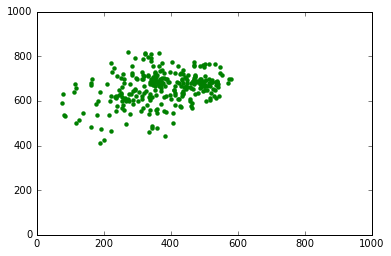

### 13
finish 0.000788290660817  <  0.001
distance sum:  26552331.1027


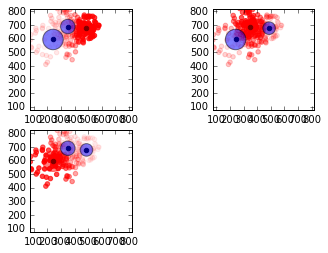

[CMeans cluster# v=[ 487.25984673  676.50252727] r=46.2609388903, CMeans cluster# v=[ 350.02126771  688.67216886] r=53.2893510795, CMeans cluster# v=[ 241.25100143  593.36053606] r=75.2822220549]


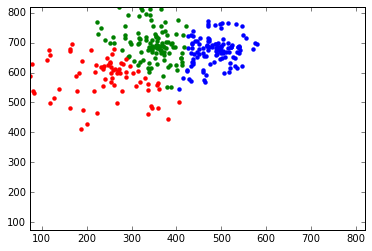

In [2]:
clusters = 3
noise = 10

q = 100 * clusters
xs = datagen_2d.generate_2d_cmeans_dataset(clusters, noise=noise, q=q)
scatter_2d_data(xs)

clusters = [CMean.CMeanCluster(1000, 2) for k in range(clusters)]
fc = FuzzyClustring.FuzzyClassifier(xs, clusters, m=2)
fc.fit(delta=.001, increase_iteration=20, increase_factor=1.2, plot_level=2, verbose_level=0, verbose_iteration=100)
print fc.C
fc.scatter_clusters_data()

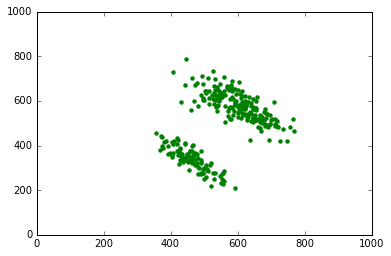

### 29
finish 0.00100999522402  <  0.0012
distance sum:  81904414.35


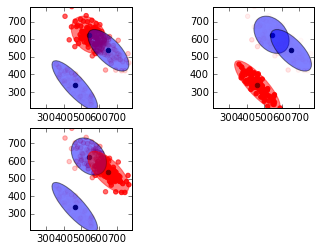

[GustafsonKessel cluster# v=[ 542.04939984  625.58013423] A=[[ 1.11768125  0.33683352]
 [ 0.33683352  0.99622036]], GustafsonKessel cluster# v=[ 461.68084255  338.31363433] A=[[ 1.96189858  1.51055526]
 [ 1.51055526  1.67275578]], GustafsonKessel cluster# v=[ 652.77206749  537.21742485] A=[[ 1.39655823  0.94291737]
 [ 0.94291737  1.35267769]]]


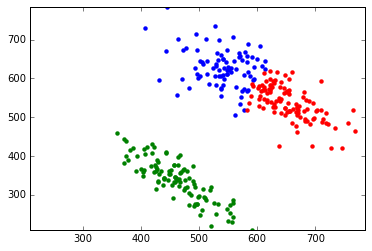

In [3]:
clusters = 3
noise = 10

q = 100 * clusters
xs = datagen_2d.generate_2d_gustafsonkessel_dataset(clusters, noise=noise, q=q)
scatter_2d_data(xs)

clusters = [GustafsonKessel.GKCluster(1000, 2) for k in range(clusters)]
fc = FuzzyClustring.FuzzyClassifier(xs, clusters, m=2)
fc.fit(delta=.001, increase_iteration=20, increase_factor=1.2, plot_level=2, verbose_level=0, verbose_iteration=100)
print fc.C
fc.scatter_clusters_data()

In [4]:
xs.shape

(300L, 2L)

In [5]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

reduced_data = PCA(n_components=2).fit_transform(data)


In [6]:
np.max(reduced_data)

9.9825596302115169

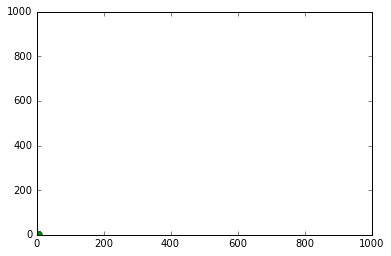

### 28
finish 0.00108599246274  <  0.0012
distance sum:  108774.517642


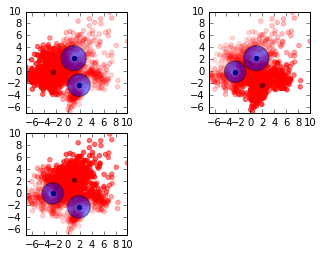

[CMeans cluster# v=[-2.52953805 -0.07424666] r=1.78625414885, CMeans cluster# v=[ 1.86695198 -2.33245503] r=1.88659519889, CMeans cluster# v=[ 0.97768962  2.17406724] r=2.09139454037]


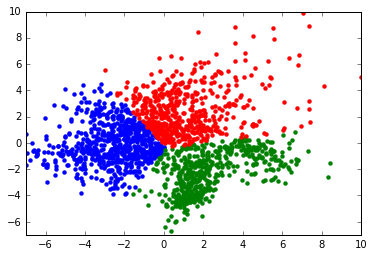

In [7]:
clusters = 3

q = 100 * clusters
scatter_2d_data(reduced_data)

clusters = [CMean.CMeanCluster(1000, 2) for k in range(clusters)]
fc = FuzzyClustring.FuzzyClassifier(reduced_data, clusters, m=2)
fc.fit(delta=.001, increase_iteration=20, increase_factor=1.2, plot_level=2, verbose_level=0, verbose_iteration=100)
print fc.C
fc.scatter_clusters_data()

In [8]:
np.amax(reduced_data,axis=0)

array([ 9.98255963,  9.86103142])

In [9]:
reduced_data[:,0]

array([ 1.91421366,  0.58898033,  1.30203906, ...,  1.02259599,
        1.07605522, -1.25770233])